In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy as deepcopy

In [4]:
mean = list()
std = list()
# epsilon=1e-17
# learning_rate = 10**(-1)

table = pd.read_csv('IA1_train.csv')
table = table.drop('id', axis=1)
table[['month','day','year']] = table['date'].str.split("/",expand=True)
table = table[['month','day','year','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','price']]
table = table.astype({'year':'int','month':'int','day':'int'})
table['age_since_renovated'] = np.where(table['yr_renovated']==0, table['year'] - table['yr_built'], table['year'] - table['yr_renovated'])
table = table[['month','day','year','age_since_renovated','bedrooms','bathrooms','sqft_living','sqft_lot','floors','view','condition','grade','sqft_above','sqft_basement','yr_built','zipcode','lat','long','sqft_living15','sqft_lot15','waterfront','price']]
table.insert(0, "bias", 1)

# for col in table.columns[0:20]:
#     mean.append(table[col].mean())
#     std.append(table[col].std())
    
# table.iloc[:,0:20] = table.iloc[:,0:20].apply(lambda x: (x-x.mean())/ x.std(), axis=0)

w0 = {'w' : [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]}

w = pd.DataFrame(data=w0)
w.insert(1,'dlw',0)

In [5]:
epsilon=1e-5
learning_rate = 10**(-9)
mse_list = list()
for i in range(5000):    
    wt = w['w'].to_numpy()
    w['dlw'] = 0
    mse = 0

    for _ in range(table.shape[0]):
        xi = table.iloc[_,:22].to_numpy()
        w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])
#     print(w['dlw'])
    w['w'] = w['w'] - learning_rate * w['dlw']
    print("======================epoch : ", i, " ===========================")
#     print(w['w'])
#     print(w['dlw'].tolist())
    for _ in range(table.shape[0]):
#         xi = table.iloc[_,:20].to_numpy()
#         w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])
        mse += 1/table.shape[0]*(table.loc[_,'price'] - sum(w['w'].to_numpy()*table.iloc[_,:22].to_numpy()))**2
    mse_list.append(mse)
    print(mse_list)
    if w['dlw'].all() < epsilon:
        print("break is worked")
        break

======================epoch :  0  ===========================
[7665525597494.42]
======================epoch :  1  ===========================
[7665525597494.42, 2841087112718977.0]
======================epoch :  2  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18]
======================epoch :  3  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20]
======================epoch :  4  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23]
======================epoch :  5  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25]
======================epoch :  6  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.4455

======================epoch :  24  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74]
======================epoch :  25  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 

======================epoch :  35  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102]
======================epoch :  36  ===========================
[7665525597494.42, 2841087112718977

======================epoch :  44  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  51  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  58  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  64  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  69  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  74  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  79  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  84  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  88  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  92  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  96  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113,

======================epoch :  100  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  104  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  108  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.08334468193

======================epoch :  114  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

<ipython-input-5-3221ea859610>:20: RuntimeWarning: overflow encountered in double_scalars
  mse += 1/table.shape[0]*(table.loc[_,'price'] - sum(w['w'].to_numpy()*table.iloc[_,:22].to_numpy()))**2


[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.08334468193

======================epoch :  118  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  121  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  124  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  127  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  130  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  133  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  136  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  139  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  142  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  145  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  148  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  151  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  154  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  157  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  160  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  163  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  166  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  169  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  172  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  175  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  178  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  181  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  184  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  187  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  190  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  193  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  196  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  199  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  202  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  205  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  208  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  211  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  214  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  217  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  220  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  223  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  226  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  229  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

<ipython-input-5-3221ea859610>:11: RuntimeWarning: overflow encountered in multiply
  w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])


======================epoch :  231  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

<ipython-input-5-3221ea859610>:11: RuntimeWarning: invalid value encountered in multiply
  w['dlw'] += ((sum(wt*xi) - table.loc[_,'price'])*xi)*(2/table.shape[0])


======================epoch :  232  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  235  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  238  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  241  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  244  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  247  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  250  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  253  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  256  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  259  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  262  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  265  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  268  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  271  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  274  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  277  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  280  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  283  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  286  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  289  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  292  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  295  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  298  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  301  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  304  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  307  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  310  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  313  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  316  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  319  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  322  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  325  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  328  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  331  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  334  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  337  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  340  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  343  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  346  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  349  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  352  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  355  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  358  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  361  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.08334468193

======================epoch :  366  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.08334468193

[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.08334468193

[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.08334468193

[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.08334468193

======================epoch :  376  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  378  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  380  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  382  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  384  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  386  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  388  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  390  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  392  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  394  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  396  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  398  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  400  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  402  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  404  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  406  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  408  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  410  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  412  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  414  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  416  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  418  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  420  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  422  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  424  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  426  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  428  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  430  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  432  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  434  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  436  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  438  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  440  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  442  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  444  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  446  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  448  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  450  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  452  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  454  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  456  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  458  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  460  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  462  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  464  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  466  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  468  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  470  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  472  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  474  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  476  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  478  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  480  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  482  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  484  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  486  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  488  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  490  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  492  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  494  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  496  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  498  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  500  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  502  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  504  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  506  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  508  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  510  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  512  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  514  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  516  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  518  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  520  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  522  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  524  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  526  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  528  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  530  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  532  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  534  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  536  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  538  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  540  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  542  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  544  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  546  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  548  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  550  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  552  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  554  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  556  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  558  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  560  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  562  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  564  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  566  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  568  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  570  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  572  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  574  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  576  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  578  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  580  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  582  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  584  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  586  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  588  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  590  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  592  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  594  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  596  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  598  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  600  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  602  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  604  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  606  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  608  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  610  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  612  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  614  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  616  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  618  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  620  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  622  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  624  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  626  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  628  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  630  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  632  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  634  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  636  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  638  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  640  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  642  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  644  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  646  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  648  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  650  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  652  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  654  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  656  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  658  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  660  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  662  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  664  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  666  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  668  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  670  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  672  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  674  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  676  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  678  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  680  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  682  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  684  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  686  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  688  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  690  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  692  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  694  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  696  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  698  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  700  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  702  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  704  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  706  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  708  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  710  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  712  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  714  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  716  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  718  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  720  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  722  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  724  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  726  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  728  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  730  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  732  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  734  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  736  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  738  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  740  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  742  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  744  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  746  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  748  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  750  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  752  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  754  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  756  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  758  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  760  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  762  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  764  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  766  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  768  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  770  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  772  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  774  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  776  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  778  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  780  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  782  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  784  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  786  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  788  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  790  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  792  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  794  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  796  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  798  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  800  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  802  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  804  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  806  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  808  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  810  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  812  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  814  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  816  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  818  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  820  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  822  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  824  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  826  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  828  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  830  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  832  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  834  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  836  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  838  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  840  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  842  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  844  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  846  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  848  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  850  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  852  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  854  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  856  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  858  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  860  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  862  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  864  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  866  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  868  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  870  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  872  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  874  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  876  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  878  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  880  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  882  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  884  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  886  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  888  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  890  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  892  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  894  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  896  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  898  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  900  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  902  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  904  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  906  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  908  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  910  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  912  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  914  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  916  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  918  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  920  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  922  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  924  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  926  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  928  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  930  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  932  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  934  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  936  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  938  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  940  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  942  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  944  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  946  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  948  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  950  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  952  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  954  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  956  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  958  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  960  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  962  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  964  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  966  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  968  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  970  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  972  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  974  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  976  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  978  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  980  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  982  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  984  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  986  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  988  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  990  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  992  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  994  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  996  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  998  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113

======================epoch :  1000  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1002  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1004  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1006  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1008  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1010  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1012  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1014  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1016  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1018  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1020  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1022  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1024  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1026  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1028  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1030  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1032  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1034  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1036  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1038  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1040  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1042  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1044  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1046  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1048  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1050  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1052  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1054  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1056  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1058  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1060  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1062  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1064  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1066  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

======================epoch :  1068  ===========================
[7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+11

KeyboardInterrupt: 

<AxesSubplot:>

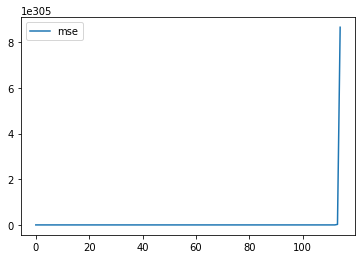

In [6]:
mse = [7665525597494.42, 2841087112718977.0, 1.0570177131861929e+18, 3.933094404573342e+20, 1.4634849500507561e+23, 5.445555756813214e+25, 2.0262646111011746e+28, 7.539631321669238e+30, 2.805459867162803e+33, 1.0438978685392664e+36, 3.884292813081255e+38, 1.4453263209423822e+41, 5.377988412649444e+43, 2.0011231337524645e+46, 7.446081116538724e+48, 2.7706502942728846e+51, 1.0309453970496999e+54, 3.836097301398689e+56, 1.427393007225267e+59, 5.31125943112216e+61, 1.9762936067286027e+64, 7.353691663242946e+66, 2.736272631451919e+69, 1.0181536371802406e+72, 3.788499789778947e+74, 1.4096822064010798e+77, 5.245358409165257e+79, 1.9517721594034727e+82, 7.262448559408806e+84, 2.7023215196480466e+87, 1.0055205948539351e+90, 3.741492858359426e+92, 1.3921911575752556e+95, 5.1802750736255625e+97, 1.9275549691871577e+100, 7.172337581366574e+102, 2.6687916663033655e+105, 9.930443007359457e+107, 3.6950691793416735e+110, 1.3749171341099341e+113, 5.115999278816989e+115, 1.9036382609195735e+118, 7.083344681930643e+120, 2.6356778445290553e+123, 9.80722809926549e+125, 3.6492215158491e+128, 1.3578574431987942e+131, 5.052521004939202e+133, 1.8800183062821367e+136, 6.995455988210155e+138, 2.602974892290284e+141, 9.685542016578742e+143, 3.6039427207986218e+146, 1.3410094254472605e+149, 4.98983035651536e+151, 1.8566914232163548e+154, 6.908657799445943e+156, 2.570677711601801e+159, 9.565365789945895e+161, 3.559225735786817e+164, 1.3243704544579619e+167, 4.927917560849664e+169, 1.8336539753500847e+172, 6.822936584875473e+174, 2.5387812677331904e+177, 9.446680685381794e+179, 3.5150635899896657e+182, 1.3079379364214804e+185, 4.8667729665042376e+187, 1.8109023714305212e+190, 6.738278981623134e+192, 2.5072805884238113e+195, 9.329468201348558e+197, 3.47144939907548e+200, 1.2917093097117256e+203, 4.8063870417938425e+205, 1.7884330647643443e+208, 6.654671792616724e+210, 2.4761707631078627e+213, 9.213710065871166e+215, 3.4283763641320036e+218, 1.2756820444867645e+221, 4.746750373300805e+223, 1.7662425526649255e+226, 6.572101984531014e+228, 2.4454469421488544e+231, 9.099388233690054e+233, 3.3858377706064355e+236, 1.2598536422943878e+239, 4.6878536644068824e+241, 1.7443273759062455e+244, 6.490556685755492e+246, 2.4151043360836034e+249, 8.986484883447154e+251, 3.3438269872589476e+254, 1.244221635682782e+257, 4.629687733844599e+259, 1.722684118183568e+262, 6.410023184387684e+264, 2.385138214875516e+267, 8.87498241490833e+269, 3.302337465128556e+272, 1.2287835878156182e+275, 4.5722435142655874e+277, 1.7013094055811053e+280, 6.330488926252267e+282, 2.3555439071774487e+285, 8.764863446219818e+287, 3.261362736512695e+290, 1.2135370920925174e+293, 4.5155120508277055e+295, 1.680199906045881e+298, 6.251941512943291e+300, 2.3263167996033244e+303, 8.656110811197916e+305]


mse_data = pd.DataFrame(data=mse,columns=['mse'])
mse_data.plot()